In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#Training models without data cleaning

In [ ]:
ab=df.copy()

In [ ]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False).set_output(transform='pandas')

In [ ]:
ohetransform=ohe.fit_transform(df[['sex']])

In [ ]:
ohetransform

,sex_female,sex_male
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
1333,0.0,1.0
1334,1.0,0.0
1335,1.0,0.0
1336,1.0,0.0


In [ ]:
ab = pd.concat([ab, ohetransform], axis=1).drop(columns=['sex'])

In [ ]:
ab.head(5)

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.900,0,yes,southwest,16884.92400,1.0,0.0
1,18,33.770,1,no,southeast,1725.55230,0.0,1.0
2,28,33.000,3,no,southeast,4449.46200,0.0,1.0
3,33,22.705,0,no,northwest,21984.47061,0.0,1.0
4,32,28.880,0,no,northwest,3866.85520,0.0,1.0


In [ ]:
ohetransform=ohe.fit_transform(df[['region']])

In [ ]:
ohetransform

,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1333,0.0,1.0,0.0,0.0
1334,1.0,0.0,0.0,0.0
1335,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,1.0


In [ ]:
ab = pd.concat([ab, ohetransform], axis=1).drop(columns=['region'])

In [ ]:
ab.head(5)

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,yes,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0
1,18,33.770,1,no,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,no,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,no,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,no,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe=OrdinalEncoder(categories=[['yes','no']])

In [ ]:
ab['smoker']=oe.fit_transform(df[['smoker']])

In [ ]:
ab['smoker']

,smoker
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1333,1.0
1334,1.0
1335,1.0
1336,1.0


In [ ]:
ab.head(5)

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0.0,16884.92400,1.0,0.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1.0,1725.55230,0.0,1.0,0.0,0.0,1.0,0.0
2,28,33.000,3,1.0,4449.46200,0.0,1.0,0.0,0.0,1.0,0.0
3,33,22.705,0,1.0,21984.47061,0.0,1.0,0.0,1.0,0.0,0.0
4,32,28.880,0,1.0,3866.85520,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
from google.colab import files

ab.to_csv('encoded wo datacleaning.csv', index=False)
files.download('encoded wo datacleaning.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training models

In [ ]:
of=ab['charges']

In [ ]:
ab=ab.drop('charges',axis=1)

In [ ]:
ab=pd.concat([ab,of],axis=1)

In [ ]:
ab.head(5)

,age,bmi,children,smoker,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,16884.92400
1,18,33.770,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1725.55230
2,28,33.000,3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,4449.46200
3,33,22.705,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,21984.47061
4,32,28.880,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3866.85520


In [ ]:
X=ab.iloc[:,0:-1]
y=ab['charges']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_Train,X_Test,y_Train,y_Test=train_test_split(X,y,train_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_Train, y_Train)

LinearRegression()

In [ ]:
model.score(X_Test,y_Test)

0.7507057139177855

In [ ]:
from sklearn.linear_model import Ridge
rrm = Ridge()

In [ ]:
rrm.fit(X_Train,y_Train)

Ridge()

In [ ]:
rrm.score(X_Test,y_Test)

0.7499864576544863

In [ ]:
from sklearn.linear_model import Lasso
lassorm = Lasso()

In [ ]:
lassorm.fit(X_Train,y_Train)

Lasso()

In [ ]:
lassorm.score(X_Test,y_Test)

0.7506948008584143

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()

In [ ]:
dt_regressor.fit(X_Train, y_Train)

DecisionTreeRegressor()

In [ ]:
dt_regressor.score(X_Test,y_Test)

0.6952335874955202

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()

In [ ]:
rfc.fit(X_Train,y_Train)

RandomForestRegressor()

In [ ]:
rfc.score(X_Test,y_Test)

0.836649250865842

#Data cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Checking for missing values

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


The given data doesnot contain any missing values

Checking for mispellings

In [ ]:
df.shape

(1338, 7)

In [ ]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

The given data doesnot have any mispelled categories

Handling outliers

In [ ]:
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)



In [ ]:
IQR = Q3 - Q1

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outliers = df[(df['charges'] < lower_bound) | (df['charges'] > upper_bound)]

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False).set_output(transform='pandas')

In [ ]:
ohetransform=ohe.fit_transform(df[['region']])
ohetransform

,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1333,0.0,1.0,0.0,0.0
1334,1.0,0.0,0.0,0.0
1335,0.0,0.0,1.0,0.0
1336,0.0,0.0,0.0,1.0


In [ ]:
df = pd.concat([df, ohetransform], axis=1).drop(columns=['region'])

In [ ]:
df

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,1725.55230,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,4449.46200,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,21984.47061,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,2205.98080,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,1629.83350,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,2007.94500,0.0,0.0,0.0,1.0


In [ ]:
ohetransform=ohe.fit_transform(df[['sex']])
ohetransform

,sex_female,sex_male
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
1333,0.0,1.0
1334,1.0,0.0
1335,1.0,0.0
1336,1.0,0.0


In [ ]:
df = pd.concat([df, ohetransform], axis=1).drop(columns=['sex'])

In [ ]:
df

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,19,27.900,0,yes,16884.92400,0.0,0.0,0.0,1.0,1.0,0.0
1,18,33.770,1,no,1725.55230,0.0,0.0,1.0,0.0,0.0,1.0
2,28,33.000,3,no,4449.46200,0.0,0.0,1.0,0.0,0.0,1.0
3,33,22.705,0,no,21984.47061,0.0,1.0,0.0,0.0,0.0,1.0
4,32,28.880,0,no,3866.85520,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,0.0,1.0,0.0,0.0,0.0,1.0
1334,18,31.920,0,no,2205.98080,1.0,0.0,0.0,0.0,1.0,0.0
1335,18,36.850,0,no,1629.83350,0.0,0.0,1.0,0.0,1.0,0.0
1336,21,25.800,0,no,2007.94500,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[['yes','no']])


In [ ]:
df['smoker']=oe.fit_transform(df[['smoker']])
df['smoker']

,smoker
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1333,1.0
1334,1.0
1335,1.0
1336,1.0


In [ ]:
df.head()

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,19,27.900,0,0.0,16884.92400,0.0,0.0,0.0,1.0,1.0,0.0
1,18,33.770,1,1.0,1725.55230,0.0,0.0,1.0,0.0,0.0,1.0
2,28,33.000,3,1.0,4449.46200,0.0,0.0,1.0,0.0,0.0,1.0
3,33,22.705,0,1.0,21984.47061,0.0,1.0,0.0,0.0,0.0,1.0
4,32,28.880,0,1.0,3866.85520,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
df.to_csv('encoded_insurance_data.csv', index=False)

In [ ]:
ad=df['charges']

In [ ]:
df=df.drop('charges', axis=1)

In [ ]:
df=pd.concat([df,ad],axis=1)
df.head(5)

,age,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,charges
0,19,27.900,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,16884.92400
1,18,33.770,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1725.55230
2,28,33.000,3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4449.46200
3,33,22.705,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,21984.47061
4,32,28.880,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,3866.85520


In [ ]:
df.shape

(1338, 11)

In [ ]:
X=df.iloc[:,0:-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaleStandard = StandardScaler()

In [ ]:
X = ab.iloc[:,0:-1]
X = scaleStandard.fit_transform(X)

In [ ]:
X=df.iloc[:,0:-1]
y=df['charges']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_Train,X_Test,y_Train,y_Test=train_test_split(X,y,test_size=0.3)

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lrm=LinearRegression()

In [ ]:
lrm.fit(X_Train,y_Train)

LinearRegression()

In [ ]:
lrm.score(X_Test,y_Test)

0.7731876363828624

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
rrm = Ridge()

In [ ]:
rrm.fit(X_Train, y_Train)

Ridge()

In [ ]:
rrm.score(X_Test,y_Test)

0.7731264139578411

## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lassorm = Lasso()

In [ ]:
lassorm.fit(X_Train, y_Train)

Lasso()

In [ ]:
lassorm.score(X_Test,y_Test)

0.7731747503722262

Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_Train, y_Train)

DecisionTreeRegressor()

In [ ]:
dt_regressor.score(X_Test,y_Test)

0.7350680938653771

Random forest regessor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()
rfc.fit(X_Train,y_Train)

RandomForestRegressor()

In [ ]:
rfc.score(X_Test,y_Test)

0.8661816946217205

Feature Selection

In [ ]:
X=df.iloc[:,0:-1]
y=df['charges']

In [ ]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression
mic=SelectKBest(score_func=mutual_info_regression)
mic.fit(X,y)

SelectKBest(score_func=<function mutual_info_regression at 0x7d9961ecc220>)

In [ ]:
feature_MI_score=pd.Series(mic.scores_,index=X.columns)
feature_MI_score.sort_values(ascending=False)

,0
age,1.497451
smoker,0.369171
sex_female,0.176660
sex_male,0.176660
children,0.161621
bmi,0.073431
region_northwest,0.057682
region_northeast,0.054498
region_southeast,0.035070
region_southwest,0.002621


In [ ]:
X=df[['age','smoker','sex_female','sex_male','children']]
y=df['charges']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_Train,X_Test,y_Train,y_Test=train_test_split(X,y,test_size=0.3)

Linear regression model

In [ ]:
lrm.fit(X_Train,y_Train)

LinearRegression()

In [ ]:
lrm.score(X_Test,y_Test)

0.7129065207864822

In [ ]:
rrm.fit(X_Train, y_Train)

Ridge()

In [ ]:
rrm.score(X_Test,y_Test)

0.7126235876866768

In [ ]:
lassorm.fit(X_Train, y_Train)

Lasso()

In [ ]:
lassorm.score(X_Test,y_Test)

0.7129203440918449

In [ ]:
dt_regressor.fit(X_Train, y_Train)

DecisionTreeRegressor()

In [ ]:
dt_regressor.score(X_Test,y_Test)

0.5561278174065095

In [ ]:
rfc.fit(X_Train,y_Train)

RandomForestRegressor()

In [ ]:
rfc.score(X_Test,y_Test)

0.671551666313337

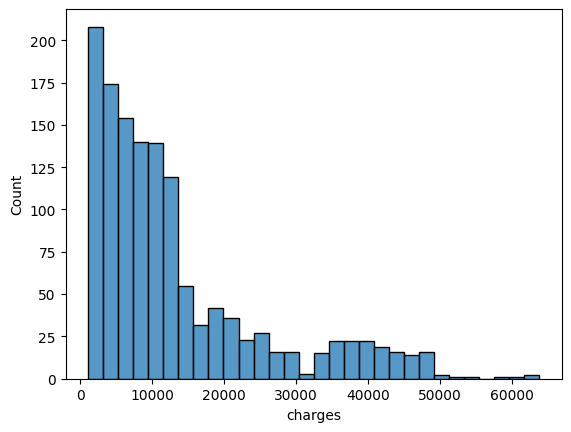

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['charges'])
plt.show()